In [5]:
using DataFrames
using Gadfly
using PyPlot
using StatsBase
using GLM
using Distributions

INFO: Precompiling module DataFrames...
INFO: Precompiling module Gadfly...
INFO: Precompiling module PyPlot...


In [6]:
colnames = [:fno, :id, :sia, :ala, :k, :ob, :gh, :pe, :coord, :neighpe]
basedata = readtable("collate-base/results.data", separator=' ', header=false, names=colnames);
mindata = readtable("collate/results.data", separator=' ', header=false, names=colnames);

basedataGhost = readtable("collate-base/results_Gh.data", separator=' ', header=false, names=colnames);
mindataGhost = readtable("collate/results_Gh.data", separator=' ', header=false, names=colnames);


basedata2n = readtable("collate-base/results_2n.data", separator=' ', header=false, names=colnames);
mindata2n = readtable("collate/results_2n.data", separator=' ', header=false, names=colnames);

basedataGhost2n = readtable("collate-base/results_Gh_2n.data", separator=' ', header=false, names=colnames);
mindataGhost2n = readtable("collate/results_Gh_2n.data", separator=' ', header=false, names=colnames);




In [7]:
sort!(basedata, cols=[:id, :fno])
sort!(mindata, cols=[:id, :fno])
# we assume all atoms exists and everything is nice
diffdata = deepcopy(mindata);

if(mindata[:,1:2] == basedata[:, 1:2])
    println("everthing is fine, copying...")
    for i in 3:length(basedata)-1
        diffdata[:,i]= deepcopy(mindata[:,i]-basedata[:,i])
    end
else
    println("the data are not aligned, not copying")
    println("try more complicated stuff like joins if you want to ignore some data")
end
diffdata[:neighpe] = (mindata[:neighpe]+mindata[:pe]) ./ (mindata[:coord]+1)-(basedata[:neighpe]+basedata[:pe]) ./ (basedata[:coord]+1)
println("done")
#hcat(basedata[basedata[:fno] .==1,:], mindata[mindata[:fno] .==1,:])
head(diffdata)

everthing is fine, copying...
done


,fno,id,sia,ala,k,ob,gh,pe,coord,neighpe
1,1,288,-2,0,-2,0,2,-0.15695999999999977,0,0.1699825454545465
2,3,288,-1,0,-1,0,1,-0.060169999999999835,-1,-0.0022545050505051734
3,4,288,-1,0,-1,0,1,-0.14992000000000028,0,0.05634769230769088
4,5,288,1,0,1,0,-1,0.2741800000000003,0,-0.07913639999999766
5,7,288,-1,0,-1,0,1,-0.09542000000000028,0,0.0702939622641523
6,9,288,-1,0,-1,-1,1,-0.57837,-3,-0.21344434716981198


In [8]:
sort!(basedata2n, cols=[:id, :fno])
sort!(mindata2n, cols=[:id, :fno])
# we assume all atoms exists and everything is nice
diffdata2n = deepcopy(mindata2n);

if(mindata2n[:,1:2] == basedata2n[:, 1:2])
    println("everthing is fine, copying...")
    for i in 3:length(basedata2n)-1
        diffdata2n[:,i]= deepcopy(mindata2n[:,i]-basedata2n[:,i])
    end
else
    println("the data are not aligned, not copying")
    println("try more complicated stuff like joins if you want to ignore some data")
end
println("done")
println(mean(mindata2n[:ob]))
println(mean(mindata[:ob]))

everthing is fine, copying...
done
14.991176470588234
4.9073529411764705


In [9]:
sort!(basedataGhost, cols=[:id, :fno])
sort!(mindataGhost, cols=[:id, :fno])
# we assume all atoms exists and everything is nice
diffdataGhost = deepcopy(mindataGhost);

if(mindataGhost[:,1:2] == basedataGhost[:, 1:2])
    println("everthing is fine, copying...")
    for i in 3:length(basedataGhost)
        diffdataGhost[:,i]= deepcopy(mindataGhost[:,i]-basedataGhost[:,i])
    end
else
    println("the data are not aligned, not copying")
    println("try more complicated stuff like joins if you want to ignore some data")
end
println("done")


everthing is fine, copying...
done


In [10]:
sort!(basedataGhost2n, cols=[:id, :fno])
sort!(mindataGhost2n, cols=[:id, :fno])
# we assume all atoms exists and everything is nice
diffdataGhost2n = deepcopy(mindataGhost2n);

if(mindataGhost2n[:,1:2] == basedataGhost2n[:, 1:2])
    println("everthing is fine, copying...")
    for i in 3:length(basedataGhost2n)
        diffdataGhost2n[:,i]= deepcopy(mindataGhost2n[:,i]-basedataGhost2n[:,i])
    end
else
    println("the data are not aligned, not copying")
    println("try more complicated stuff like joins if you want to ignore some data")
end
println("done")
println(head(mindataGhost2n))
println(head(mindataGhost))

everthing is fine, copying...
done
6×10 DataFrames.DataFrame
│ Row │ fno │ id  │ sia │ ala │ k │ ob │ gh │ pe │ coord │ neighpe  │
├─────┼─────┼─────┼─────┼─────┼───┼────┼────┼────┼───────┼──────────┤
│ 1   │ 2   │ 288 │ 4   │ 3   │ 4 │ 2  │ 2  │ 0  │ 55    │ -592.911 │
│ 2   │ 6   │ 288 │ 5   │ 4   │ 5 │ 2  │ 1  │ 0  │ 54    │ -605.452 │
│ 3   │ 8   │ 288 │ 6   │ 4   │ 6 │ 2  │ 0  │ 0  │ 55    │ -608.493 │
│ 4   │ 10  │ 288 │ 3   │ 4   │ 3 │ 2  │ 3  │ 0  │ 55    │ -596.929 │
│ 5   │ 15  │ 288 │ 5   │ 4   │ 5 │ 2  │ 1  │ 0  │ 55    │ -606.218 │
│ 6   │ 19  │ 288 │ 4   │ 3   │ 4 │ 2  │ 2  │ 0  │ 54    │ -590.128 │
6×10 DataFrames.DataFrame
│ Row │ fno │ id  │ sia │ ala │ k │ ob │ gh │ pe │ coord │ neighpe  │
├─────┼─────┼─────┼─────┼─────┼───┼────┼────┼────┼───────┼──────────┤
│ 1   │ 2   │ 288 │ 4   │ 1   │ 4 │ 2  │ 2  │ 0  │ 53    │ -563.829 │
│ 2   │ 6   │ 288 │ 5   │ 1   │ 5 │ 2  │ 1  │ 0  │ 51    │ -561.187 │
│ 3   │ 8   │ 288 │ 6   │ 1   │ 6 │ 2  │ 0  │ 0  │ 52    │ -564.558 │
│ 4

In [35]:
println(head(mindata))
println(head(basedata))

6×10 DataFrames.DataFrame
│ Row │ fno │ id  │ sia │ ala │ k │ ob │ gh │ pe       │ coord │ neighpe  │
├─────┼─────┼─────┼─────┼─────┼───┼────┼────┼──────────┼───────┼──────────┤
│ 1   │ 1   │ 288 │ 3   │ 2   │ 3 │ 4  │ 3  │ -4.23541 │ 54    │ -546.608 │
│ 2   │ 3   │ 288 │ 3   │ 2   │ 3 │ 4  │ 3  │ -3.9757  │ 53    │ -542.927 │
│ 3   │ 4   │ 288 │ 4   │ 2   │ 4 │ 4  │ 2  │ -4.07838 │ 51    │ -530.837 │
│ 4   │ 5   │ 288 │ 4   │ 3   │ 4 │ 6  │ 2  │ -4.1929  │ 49    │ -508.632 │
│ 5   │ 7   │ 288 │ 4   │ 2   │ 4 │ 4  │ 2  │ -4.03533 │ 52    │ -538.23  │
│ 6   │ 9   │ 288 │ 4   │ 2   │ 4 │ 3  │ 2  │ -3.82134 │ 49    │ -525.015 │
6×10 DataFrames.DataFrame
│ Row │ fno │ id  │ sia │ ala │ k │ ob │ gh │ pe       │ coord │ neighpe  │
├─────┼─────┼─────┼─────┼─────┼───┼────┼────┼──────────┼───────┼──────────┤
│ 1   │ 1   │ 288 │ 5   │ 2   │ 5 │ 4  │ 1  │ -4.07845 │ 54    │ -556.114 │
│ 2   │ 3   │ 288 │ 4   │ 2   │ 4 │ 4  │ 2  │ -3.91553 │ 54    │ -552.991 │
│ 3   │ 4   │ 288 │ 5   │ 2   │ 5 │ 

There is tightening of energies of K ions

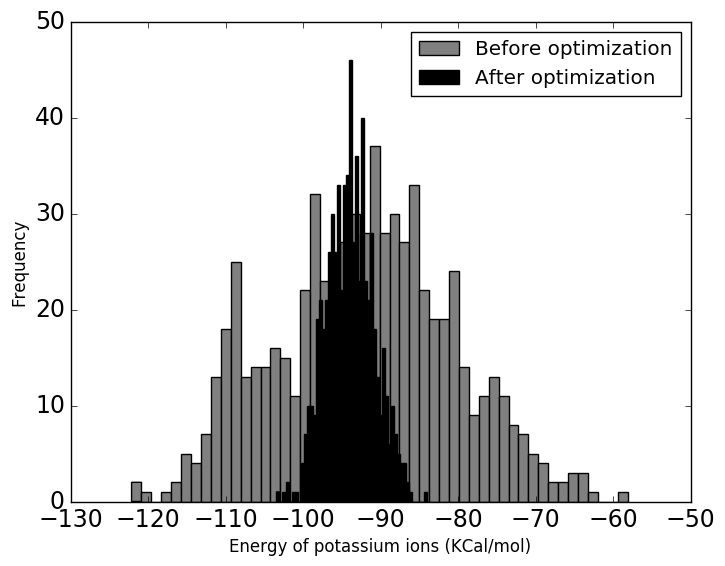

In [89]:
subplot(111)
evtokcal=23.0609
kcaltokj=4.18400
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
PyPlot.plt[:hist](basedata[:pe]*evtokcal, bins=50, facecolor="grey", label="Before optimization")
PyPlot.plt[:hist](mindata[:pe]*evtokcal, bins=50,facecolor="black", label="After optimization");
PyPlot.legend()
PyPlot.xlabel("Energy of potassium ions (KCal/mol)")
PyPlot.ylabel("Frequency")
PyPlot.plt[:savefig]("K_all_histogram_KCalmol.png", bbox_inches="tight", dpi=600)

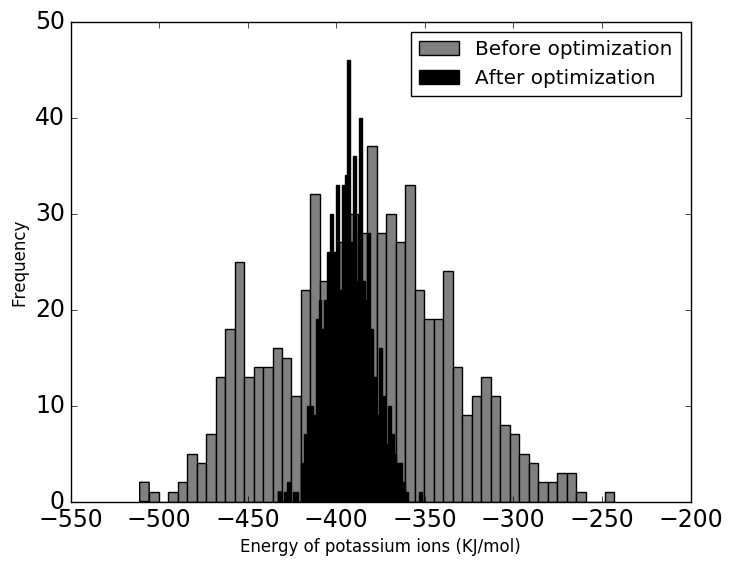

In [88]:
subplot(111)
evtokcal=23.0609
kcaltokj=4.18400
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
PyPlot.plt[:hist](basedata[:pe]*evtokcal*kcaltokj, bins=50, facecolor="grey", label="Before optimization")
PyPlot.plt[:hist](mindata[:pe]*evtokcal*kcaltokj, bins=50,facecolor="black", label="After optimization");
PyPlot.legend()
PyPlot.xlabel("Energy of potassium ions (KJ/mol)")
PyPlot.ylabel("Frequency")
PyPlot.plt[:savefig]("K_all_histogram_KJmol.png", bbox_inches="tight", dpi=600)

In [90]:
base_pe = basedata[:pe];
min_pe = mindata[:pe];
tt = zeros(680,2);
tt[:,1] = base_pe;
tt[:,2] = min_pe;
f = open("K_overall_energies.data", "w")
write(f, "before,after\n")
writecsv(f, tt)
close(f)

In [86]:
function plot_Al_En_relation(scalefactor=1, units="(eV)", filename="K_Al.png")
    PyPlot.clf()
    abcd = [0:10:45]
    PyPlot.rc("xtick", labelsize=17)
    PyPlot.rc("ytick", labelsize=17)
    PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"

    subplot(211)

    PyPlot.plt[:hist](basedata[basedata[:ala] .==1,:][:pe]*scalefactor, bins=50, label="Al = 1");
    PyPlot.plt[:hist](mindata[basedata[:ala] .==2,:][:pe]*scalefactor, bins=50, alpha=0.5, label="Al = 2");
    PyPlot.plt[:hist](basedata[basedata[:ala] .==3,:][:pe]*scalefactor, bins=50, alpha=0.5, label="Al = 3");
    PyPlot.plt[:hist](basedata[basedata[:ala] .==0,:][:pe]*scalefactor, bins=50, label="Al = 0");
    PyPlot.ylim(0, 45)
    PyPlot.xlim(-5.5*scalefactor, -2.5*scalefactor)
    PyPlot.ylabel("Frequency")
    PyPlot.legend();

    subplot(212)
    PyPlot.plt[:hist](mindata[mindata[:ala] .==1,:][:pe]*scalefactor, bins=20, label="Al = 1");
    PyPlot.plt[:hist](mindata[mindata[:ala] .==2,:][:pe]*scalefactor, bins=20, alpha=0.5, label="Al = 2");

    PyPlot.plt[:hist](mindata[mindata[:ala] .==3,:][:pe]*scalefactor, bins=20, alpha=0.5, label="Al = 3");
    PyPlot.ylim(0, 45)
    PyPlot.xlim(-5.5*scalefactor, -2.5*scalefactor)
    PyPlot.ylabel("Frequency")
    PyPlot.xlabel(string("Energy of potassium ions ",units))
    PyPlot.legend()
    PyPlot.savefig(filename, bbox_inches="tight", dpi=600)
end
#
#mindata[mindata[:ala] .== 0,:]

plot_Al_En_relation (generic function with 4 methods)

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in plot_Al_En_relation at In[86]:3
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/KedarKolluri/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/KedarKolluri/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[87], in expression starting on line 3


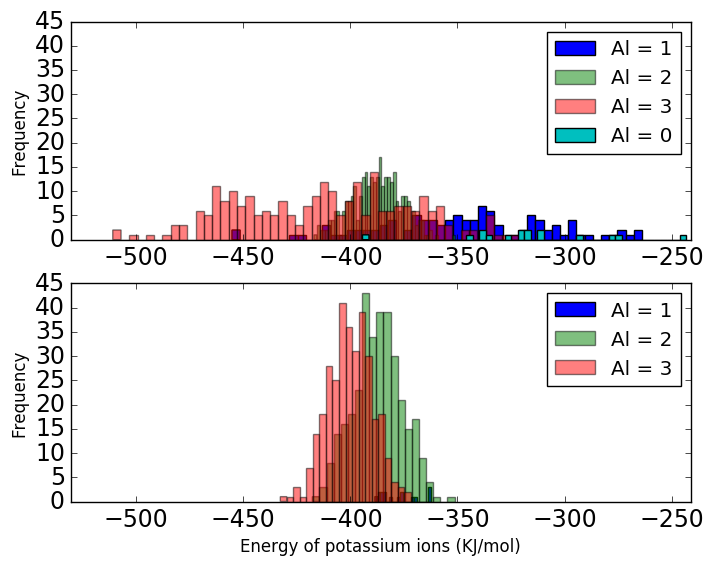

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in plot_Al_En_relation at In[86]:3
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/KedarKolluri/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/KedarKolluri/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[87], in expression starting on line 4


In [87]:
evtokcal=23.0609
kcaltokj=4.18400
plot_Al_En_relation(evtokcal, "(KCal/mol)", "K_Al_KCalmol.png")
plot_Al_En_relation(evtokcal*kcaltokj, "(KJ/mol)", "K_Al_KJmol.png")

In [106]:
#f = open(K_Al_energies_before.data)
writetable("K_Al_energies_before_optimization.data", basedata[[:pe, :ala]], separator=',')
writetable("K_Al_energies_after_optimization.data", mindata[[:pe, :ala]], separator=',')

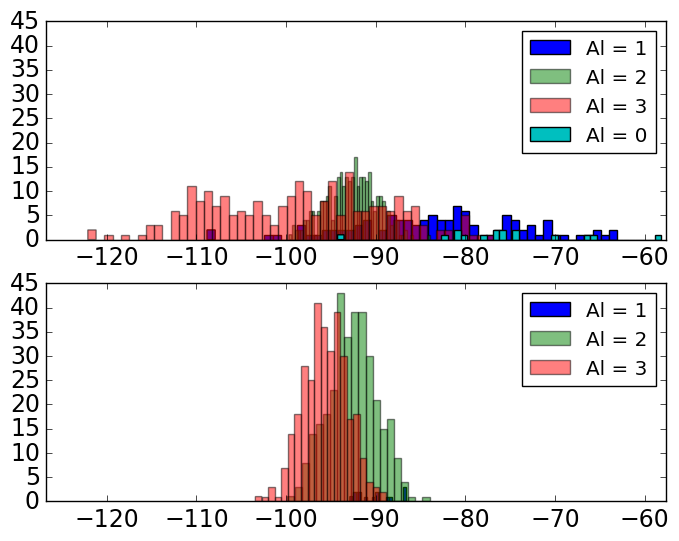

PyObject <matplotlib.legend.Legend object at 0x3267a23c8>

In [72]:
#Gadfly.plot(x=basedata[:ala,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
#            Theme(default_color=color("black")))

#PyPlot.rc("text", usetex = "True")
abcd = [0:10:45]
PyPlot.rc("xtick", labelsize=17)
PyPlot.rc("ytick", labelsize=17)
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
evtokcal=23.0609
kcaltokj=4.18400
subplot(211)

PyPlot.plt[:hist](basedata[basedata[:ala] .==1,:][:pe]*evtokcal, bins=50, label="Al = 1");
PyPlot.plt[:hist](mindata[basedata[:ala] .==2,:][:pe]*evtokcal, bins=50, alpha=0.5, label="Al = 2");
PyPlot.plt[:hist](basedata[basedata[:ala] .==3,:][:pe]*evtokcal, bins=50, alpha=0.5, label="Al = 3");
PyPlot.plt[:hist](basedata[basedata[:ala] .==0,:][:pe]*evtokcal, bins=50, label="Al = 0");
PyPlot.ylim(0, 45)
PyPlot.xlim(-5.5*evtokcal, -2.5*evtokcal)
PyPlot.legend();

subplot(212)
PyPlot.plt[:hist](mindata[mindata[:ala] .==1,:][:pe]*evtokcal, bins=20, label="Al = 1");
PyPlot.plt[:hist](mindata[mindata[:ala] .==2,:][:pe]*evtokcal, bins=20, alpha=0.5, label="Al = 2");

PyPlot.plt[:hist](mindata[mindata[:ala] .==3,:][:pe]*evtokcal, bins=20, alpha=0.5, label="Al = 3");
PyPlot.ylim(0, 45)
PyPlot.xlim(-5.5*evtokcal, -2.5*evtokcal)

PyPlot.legend()
#PyPlot.savefig("histogram.png", bbox_inches="tight", dpi=600)
#mindata[mindata[:ala] .== 0,:]

In [108]:
## save all data files again
writetable("all_data_before_optimization.data", basedata, separator=',')
writetable("all_data_after_optimization.data", mindata, separator=',')

# Exploration: 
## Some interesting things (such as no Ghosts around Al etc) but nothing fantastic

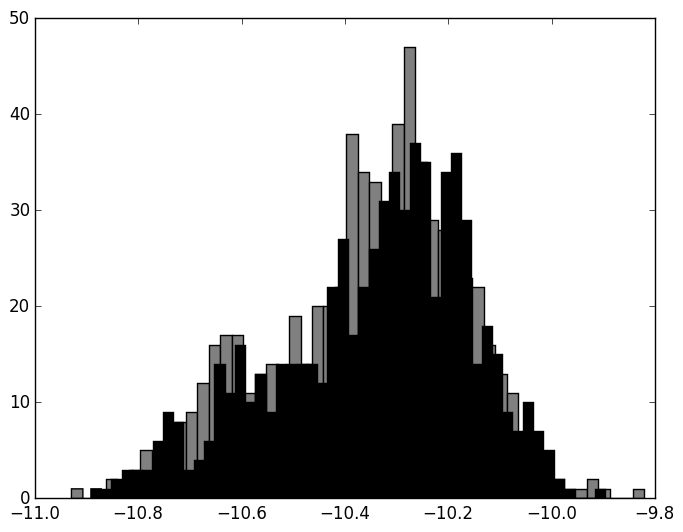

In [9]:
subplot(111)
PyPlot.hist((basedata[:pe]+basedata[:neighpe])./(basedata[:coord]+1), bins=50, facecolor="grey")
PyPlot.hist((mindata[:pe]+mindata[:neighpe])./(mindata[:coord]+1), bins=50, facecolor="black")
#PyPlot.hist(mindata[:pe], bins=50,facecolor="black");

In [10]:
#PyPlot.hist((diffdata[:pe]./diffdata[:coord] + diffdata[:neighpe]), bins=50, facecolor="grey");
head(diffdata)

,fno,id,sia,ala,k,ob,gh,pe,coord,neighpe
1,1,288,-2,0,-2,0,2,-0.15695999999999977,0,0.1699825454545465
2,3,288,-1,0,-1,0,1,-0.060169999999999835,-1,-0.0022545050505051734
3,4,288,-1,0,-1,0,1,-0.14992000000000028,0,0.05634769230769088
4,5,288,1,0,1,0,-1,0.2741800000000003,0,-0.07913639999999766
5,7,288,-1,0,-1,0,1,-0.09542000000000028,0,0.0702939622641523
6,9,288,-1,0,-1,-1,1,-0.57837,-3,-0.21344434716981198


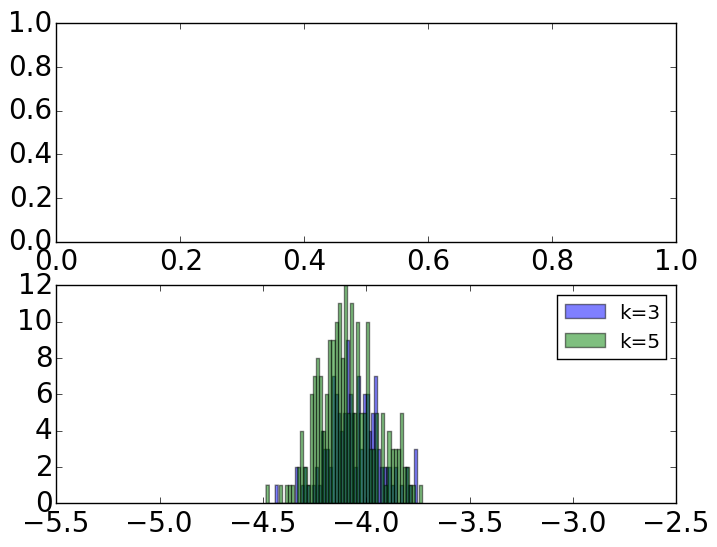

PyObject <matplotlib.legend.Legend object at 0x1263c0750>

In [76]:
subplot(211)

#PyPlot.hist(basedata[basedata[:k] .==1,:][:pe], bins=50, label="base K=1");
#PyPlot.hist(mindata[basedata[:k] .==2,:][:pe], bins=50, alpha=0.5, label="base K=2");
#PyPlot.hist(basedata[basedata[:k] .==3,:][:pe], bins=50, alpha=0.5, label="base K=3");
#PyPlot.hist(basedata[basedata[:k] .==4,:][:pe], bins=50, label="base K=4");
#PyPlot.hist(basedata[basedata[:k] .==5,:][:pe], bins=50, label="base K=5");
#PyPlot.hist(basedata[basedata[:k] .==6,:][:pe], bins=50, label="base K=6");
PyPlot.legend();

subplot(212)
#PyPlot.hist(mindata[mindata[:k] .==1,:][:pe], bins=50, label="k=1");
#PyPlot.hist(mindata[mindata[:k] .==2,:][:pe], bins=50, alpha=0.5, label="k=2");
PyPlot.hist(mindata[mindata[:k] .==3,:][:pe], bins=50, alpha=0.5, label="k=3");
#PyPlot.hist(mindata[mindata[:k] .==4,:][:pe], bins=50, alpha=0.5, label="k=4");
PyPlot.hist(mindata[mindata[:k] .==5,:][:pe], bins=50, alpha=0.5, label="k=5");
#PyPlot.hist(mindata[mindata[:k] .==6,:][:pe], bins=50, alpha=0.5, label="k=6");
PyPlot.xlim(-5.5, -2.5)
PyPlot.legend()

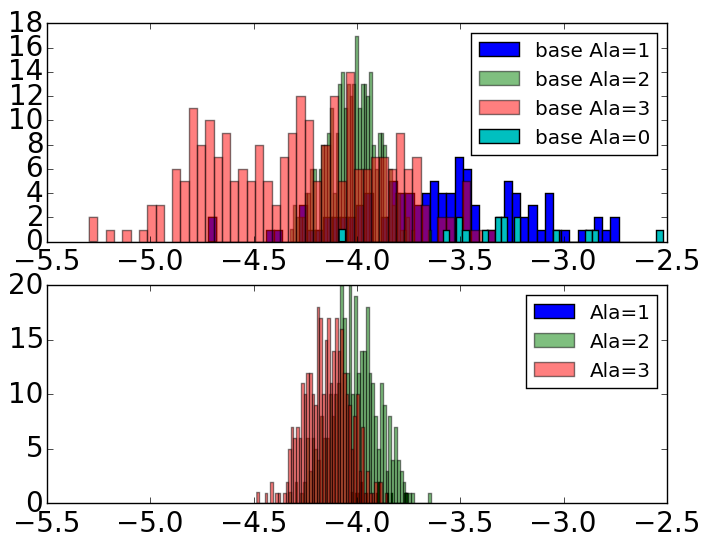

PyObject <matplotlib.legend.Legend object at 0x1184a9c50>

In [34]:
#Gadfly.plot(x=basedata[:ala,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
#            Theme(default_color=color("black")))
subplot(211)

PyPlot.hist(basedata[basedata[:ala] .==1,:][:pe], bins=50, label="base Ala=1");
PyPlot.hist(mindata[basedata[:ala] .==2,:][:pe], bins=50, alpha=0.5, label="base Ala=2");
PyPlot.hist(basedata[basedata[:ala] .==3,:][:pe], bins=50, alpha=0.5, label="base Ala=3");
PyPlot.hist(basedata[basedata[:ala] .==0,:][:pe], bins=50, label="base Ala=0");
PyPlot.legend();

subplot(212)
PyPlot.hist(mindata[mindata[:ala] .==1,:][:pe], bins=50, label="Ala=1");
PyPlot.hist(mindata[mindata[:ala] .==2,:][:pe], bins=50, alpha=0.5, label="Ala=2");
PyPlot.hist(mindata[mindata[:ala] .==3,:][:pe], bins=50, alpha=0.5, label="Ala=3");
PyPlot.xlim(-5.5, -2.5)
PyPlot.legend()
#mindata[mindata[:ala] .== 0,:]

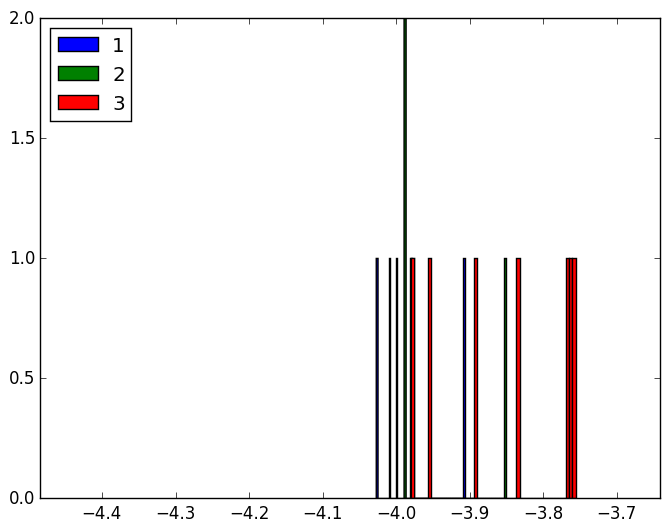

In [12]:
t = mindata[(mindata[:ala] .==1),:]
#head(t1[t1[:k] .== 4,:])
for kk in 0:6
    tt  = t[t[:k].==kk,:]
#    println(tt)
#    println(kk, " " ,size(tt)[1])
    if(size(tt)[1]>1)
        PyPlot.hist(tt[:pe], bins=50, label="$kk")
        PyPlot.legend(loc=2)
    end
    PyPlot.xlim(extrema(mindata[:pe]))
end

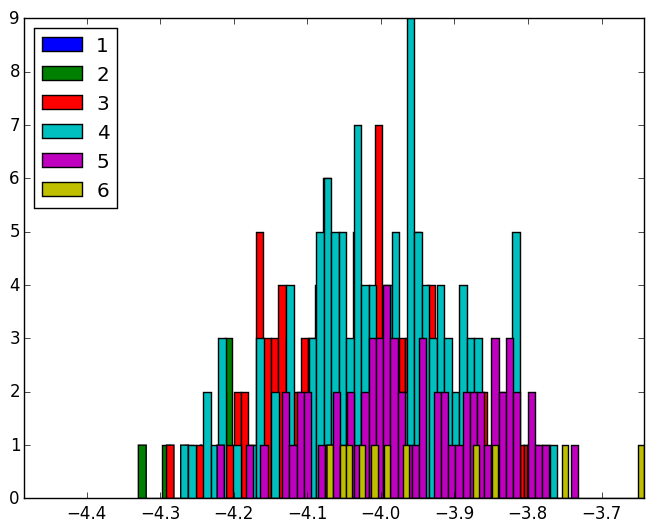

In [13]:
t = mindata[(mindata[:ala] .==2),:]
#head(t1[t1[:k] .== 4,:])
for kk in 0:6
    tt  = t[t[:k].==kk,:]
#    println(tt)
#    println(kk, " " ,size(tt)[1])
    if(size(tt)[1]>1)
        PyPlot.hist(tt[:pe], bins=50, label="$kk")
        PyPlot.legend(loc=2)
    end
    PyPlot.xlim(extrema(mindata[:pe]))
end

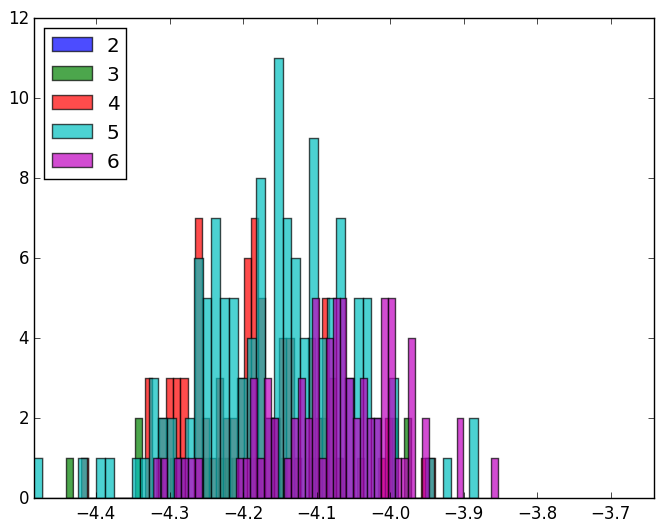

In [14]:
t = mindata[(mindata[:ala] .==3),:]
#head(t1[t1[:k] .== 4,:])
for kk in 0:6
    tt  = t[t[:k].==kk,:]
#    println(tt)
#    println(kk, " " ,size(tt)[1])
    if(size(tt)[1]>1)
        PyPlot.hist(tt[:pe], bins=50, label="$kk", alpha=0.7)
        PyPlot.legend(loc=2)
    end
    PyPlot.xlim(extrema(mindata[:pe]))
end

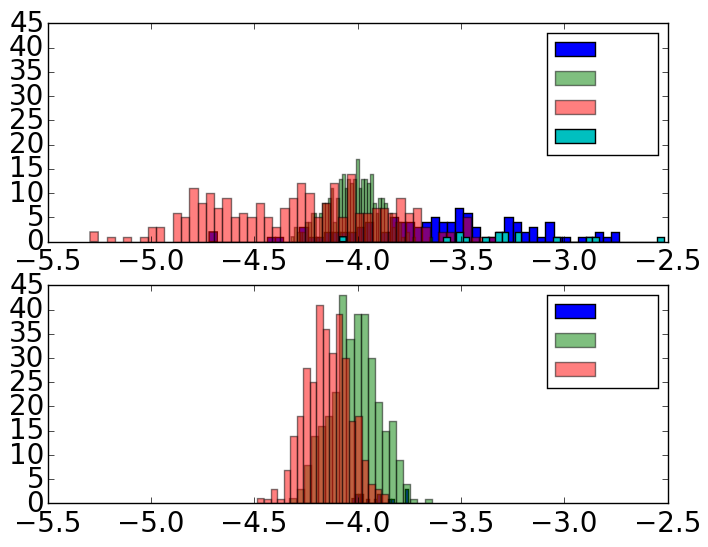

In [15]:
#Gadfly.plot(x=basedata[:ala,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
#            Theme(default_color=color("black")))

#PyPlot.rc("text", usetex = "True")
abcd = [0:10:45]
PyPlot.rc("xtick", labelsize=20)
PyPlot.rc("ytick", labelsize=20)
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
subplot(211)

PyPlot.hist(basedata[basedata[:ala] .==1,:][:pe], bins=50, label="      ");
PyPlot.hist(mindata[basedata[:ala] .==2,:][:pe], bins=50, alpha=0.5, label="      ");
PyPlot.hist(basedata[basedata[:ala] .==3,:][:pe], bins=50, alpha=0.5, label="      ");
PyPlot.hist(basedata[basedata[:ala] .==0,:][:pe], bins=50, label="      ");
PyPlot.ylim(0, 45)
PyPlot.legend();

subplot(212)
PyPlot.hist(mindata[mindata[:ala] .==1,:][:pe], bins=20, label="      ");
PyPlot.hist(mindata[mindata[:ala] .==2,:][:pe], bins=20, alpha=0.5, label="      ");

PyPlot.hist(mindata[mindata[:ala] .==3,:][:pe], bins=20, alpha=0.5, label="      ");
PyPlot.xlim(-5.5, -2.5)

PyPlot.legend()
PyPlot.savefig("histogram.png", bbox_inches="tight", dpi=600)
#mindata[mindata[:ala] .== 0,:]

In [58]:
# check the f-statistic for different cases
alafull = mindata[(mindata[:ala] .==2) | (mindata[:ala] .==3),:pe];
ala2 = mindata[(mindata[:ala] .==2),:pe];
ala3 = mindata[(mindata[:ala] .==3),:pe];
println(mean(alafull, 1), " ", mean(ala2, 1), " ", mean(ala3, 1))
println(std(alafull), " ", std(ala2), " ", std(ala3))

[-4.079597093373494] [-4.013690178571428] [-4.147111493902438]
0.1304937700245457 0.11780249773584531 0.10617712199034626


In [60]:
(mean(ala3)-mean(alafull))^2

0.004558194278782596

In [61]:
SSE = (size(ala2, 1)-1)*std(ala2)^2 +  (size(ala3, 1)-1)*std(ala3)^2
SSG = (size(ala2, 1))*(mean(ala2)-mean(alafull))^2 +  (size(ala3, 1))*(mean(ala3)-mean(alafull))^2
println("SSE: ", SSE, " and SSG: ", SSG)
MSG = SSG/1;
MSE = SSE/(size(alafull, 1)-2)
F_statistic  = MSG/MSE
println("F statistic is: ", F_statistic)
fdist = FDist(1, size(alafull, 1)-1)
println(fdist)
println(pdf(fdist, F_statistic))
println(1-cdf(fdist, F_statistic))

SSE: 8.335399601957276 and SSG: 2.954578120132897
F statistic is: 234.65350300286698
FDist(d1=1.0, d2=663.0)
5.32017415450694e-46
0.0


#### Coordination number changes to all atoms do not show patterns

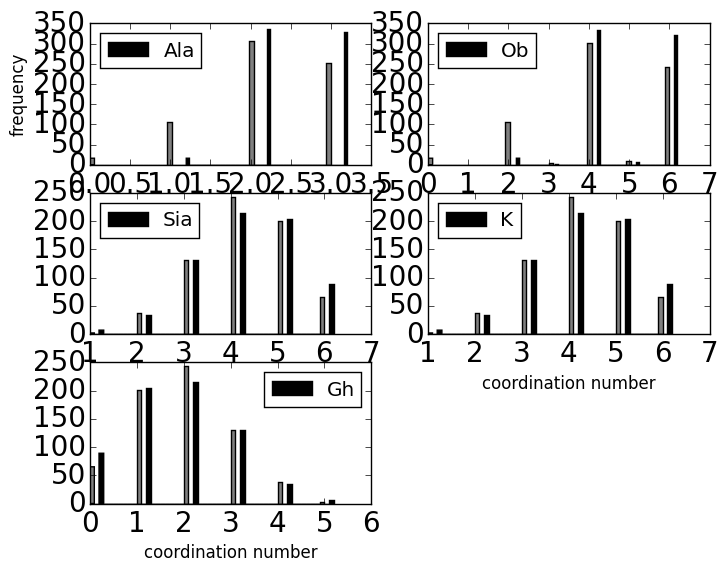

PyObject <matplotlib.text.Text object at 0x114dd03d0>

In [16]:
d1 = basedata
d2 = mindata
subplot(321)
PyPlot.hist(d1[:ala], bins=50,facecolor="grey")
PyPlot.hist(d2[:ala]+0.2, bins=50,facecolor="black", label="Ala");
PyPlot.legend(loc=2)
PyPlot.ylabel("frequency")

subplot(322)
PyPlot.hist(d1[:ob], bins=50,facecolor="grey")
PyPlot.hist(d2[:ob]+0.2, bins=50,facecolor="black", label="Ob");
PyPlot.legend(loc=2)

#PyPlot.title("Number of empty neighbors")

subplot(323)
PyPlot.hist(d1[:sia], bins=50,facecolor="grey")
PyPlot.hist(d2[:sia]+0.2, bins=50,facecolor="black", label="Sia");
PyPlot.legend(loc=2)


subplot(324)

PyPlot.hist(d1[:k], bins=50,facecolor="grey")
PyPlot.hist(d2[:k]+0.2, bins=50, facecolor="black", label="K");
PyPlot.legend(loc=2)


PyPlot.xlabel("coordination number")

subplot(325)

PyPlot.hist(d1[:gh], bins=50,facecolor="grey")
PyPlot.hist(d2[:gh]+0.2, bins=50,facecolor="black", label="Gh");
PyPlot.legend()

PyPlot.xlabel("coordination number")

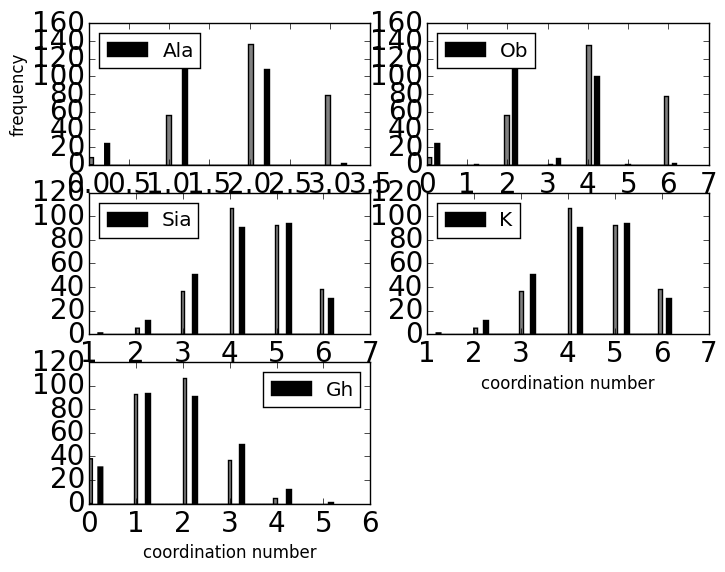

PyObject <matplotlib.text.Text object at 0x1142a04d0>

In [17]:
d1 = basedataGhost
d2 = mindataGhost
subplot(321)
PyPlot.hist(d1[:ala], bins=50,facecolor="grey")
PyPlot.hist(d2[:ala]+0.2, bins=50,facecolor="black", label="Ala");
PyPlot.legend(loc=2)
PyPlot.ylabel("frequency")

subplot(322)
PyPlot.hist(d1[:ob], bins=50,facecolor="grey")
PyPlot.hist(d2[:ob]+0.2, bins=50,facecolor="black", label="Ob");
PyPlot.legend(loc=2)

#PyPlot.title("Number of empty neighbors")

subplot(323)
PyPlot.hist(d1[:sia], bins=50,facecolor="grey")
PyPlot.hist(d2[:sia]+0.2, bins=50,facecolor="black", label="Sia");
PyPlot.legend(loc=2)


subplot(324)

PyPlot.hist(d1[:k], bins=50,facecolor="grey")
PyPlot.hist(d2[:k]+0.2, bins=50, facecolor="black", label="K");
PyPlot.legend(loc=2)


PyPlot.xlabel("coordination number")

subplot(325)

PyPlot.hist(d1[:gh], bins=50,facecolor="grey")
PyPlot.hist(d2[:gh]+0.2, bins=50,facecolor="black", label="Gh");
PyPlot.legend()

PyPlot.xlabel("coordination number")

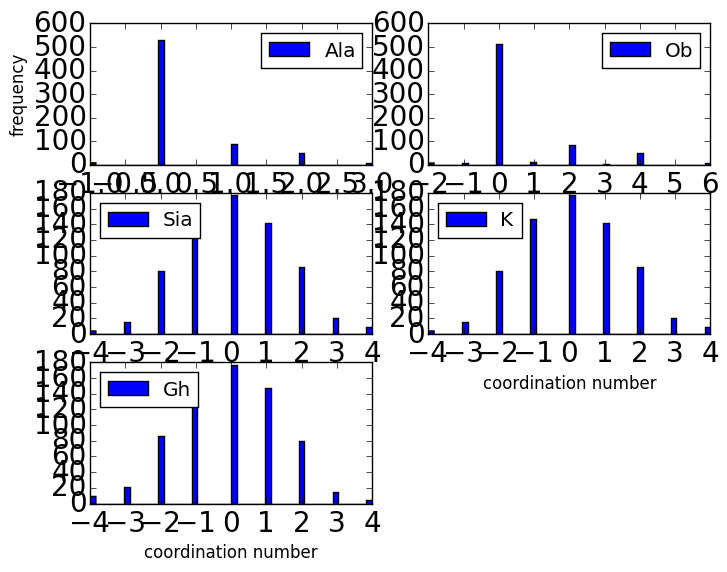

PyObject <matplotlib.text.Text object at 0x11e13d550>

In [18]:
dd=diffdata
subplot(321)
PyPlot.hist(dd[:ala], bins=50, label="Ala")
PyPlot.legend()
PyPlot.ylabel("frequency")

subplot(322)
PyPlot.hist(dd[:ob], bins=50, label="Ob")
PyPlot.legend()


subplot(323)
PyPlot.hist(dd[:sia], bins=50, label="Sia")
PyPlot.legend(loc=2)


subplot(324)
PyPlot.hist(dd[:k], bins=50, label="K")
PyPlot.legend(loc=2)

PyPlot.xlabel("coordination number")

subplot(325)
PyPlot.hist(dd[:gh], bins=50, label="Gh")
PyPlot.legend(loc=2)


PyPlot.xlabel("coordination number")

In [19]:
unique(diffdata[:k])

9-element DataArray{Int64,1}:
 -2
 -1
  1
  2
  0
  3
 -4
  4
 -3

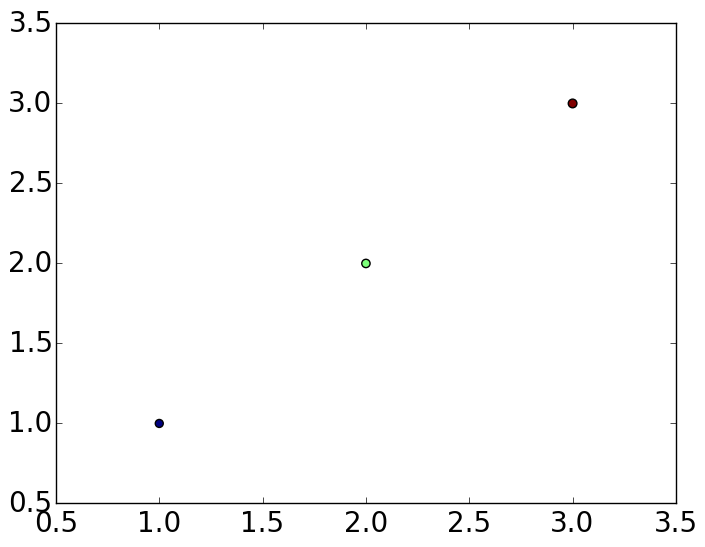

PyObject <matplotlib.collections.PathCollection object at 0x11e64eb10>

In [20]:
test_data = sort(unique(mindata[:ala]))
PyPlot.scatter(test_data, test_data, c = test_data, s = 3*(test_data+10))

In [21]:
(rand(size(mindata)[1])*2-1)*0.3

680-element Array{Float64,1}:
 -0.29135   
 -0.277988  
  0.17969   
  0.280578  
  0.180779  
 -0.0897098 
 -0.115764  
 -0.0969018 
  0.0225447 
 -0.0771542 
 -0.237139  
 -0.133747  
  0.00273544
  ⋮         
  0.143858  
 -0.293337  
 -0.209441  
  0.175182  
  0.25229   
  0.158494  
 -0.216601  
  0.0345909 
  0.0487407 
 -0.245534  
  0.254543  
  0.130581  

/Users/KedarKolluri/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


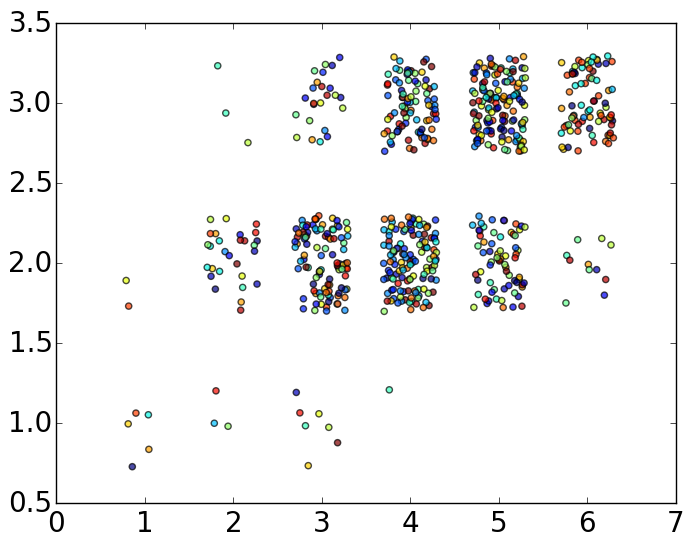

In [22]:
ran1 = (rand(size(mindata)[1])*2-1)*0.3;
ran2=  (rand(size(mindata)[1])*2-1)*0.3;
PyPlot.scatter(mindata[:k] .+ ran1, mindata[:ala] .+ ran2 ,
c=mindata[:fno], alpha=0.7)
PyPlot.legend()
#PyPlot.xticks([0:4]);

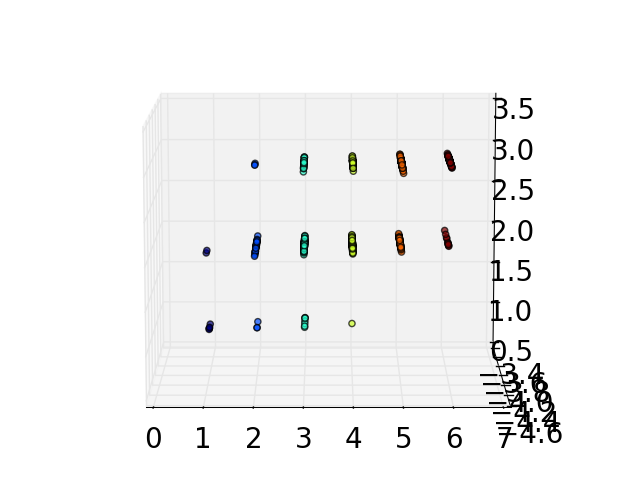

In [23]:
ran1 = rand(size(basedata)[1])/3;
ran2=  rand(size(basedata)[1])/3;
fig = PyPlot.figure()
ax = fig[:gca](projection="3d")
ax[:scatter3D](mindata[:k], mindata[:pe], mindata[:ala], c=mindata[:sia], alpha=0.7)
ax[:view_init](azim=270, elev=10)

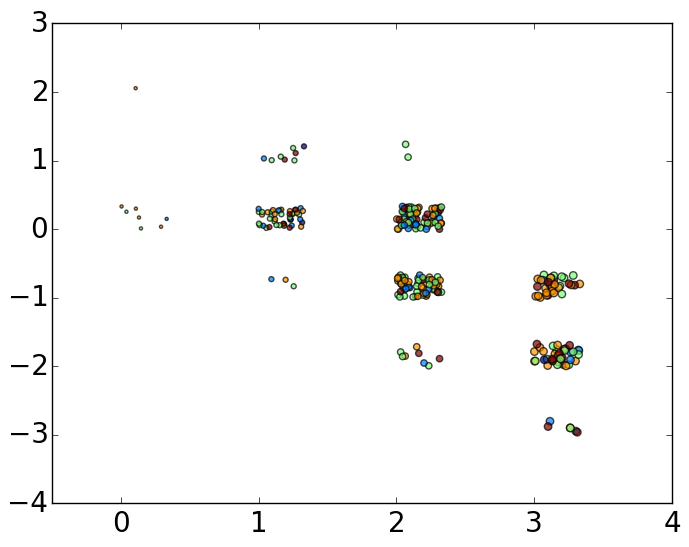

In [24]:
ran1 = rand(size(basedataGhost)[1])/3;
ran2=  rand(size(basedataGhost)[1])/3;
PyPlot.scatter(basedataGhost[:ala] .+ ran1, diffdataGhost[:ala] .+ ran2,
c=basedataGhost[:sia], s = 5+4*basedataGhost[:ob], alpha=0.7)
PyPlot.xticks([0:4]);

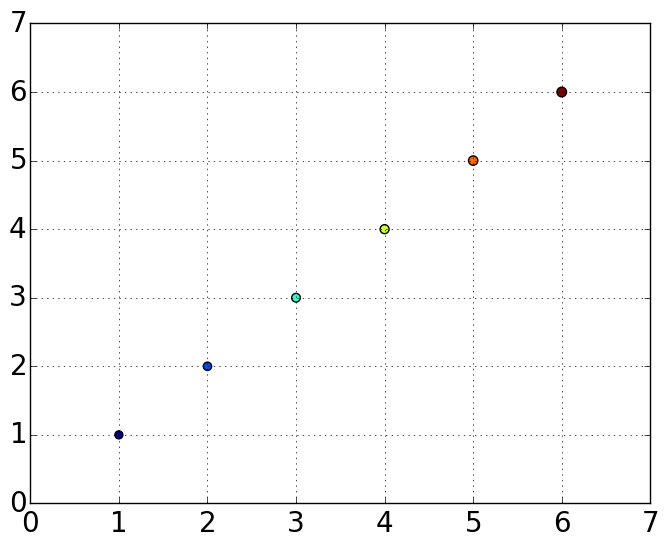

In [25]:
test_data = sort(unique(mindata[:sia]))
PyPlot.scatter(test_data, test_data, c = test_data, s = 3*(test_data+10))
PyPlot.grid()

In [26]:
size(diffdataGhost)

(280,10)

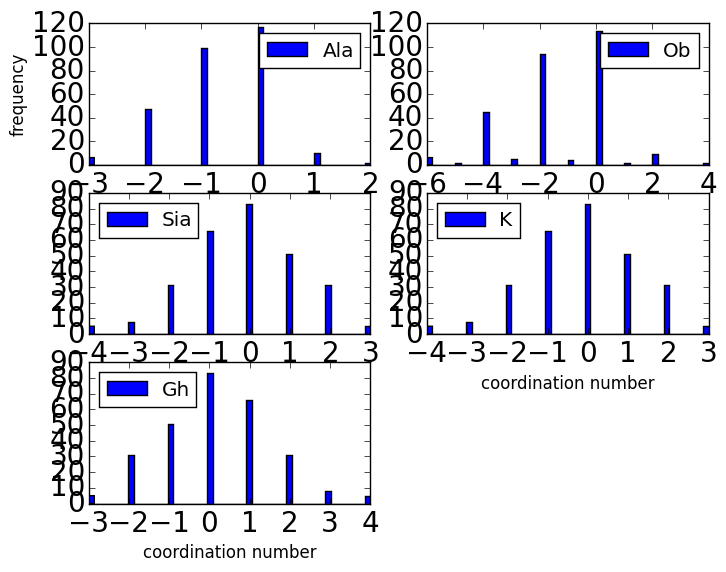

PyObject <matplotlib.text.Text object at 0x11513b290>

In [27]:
dd=diffdataGhost
subplot(321)
PyPlot.hist(dd[:ala], bins=50, label="Ala")
PyPlot.legend()
PyPlot.ylabel("frequency")

subplot(322)
PyPlot.hist(dd[:ob], bins=50, label="Ob")
PyPlot.legend()


subplot(323)
PyPlot.hist(dd[:sia], bins=50, label="Sia")
PyPlot.legend(loc=2)


subplot(324)
PyPlot.hist(dd[:k], bins=50, label="K")
PyPlot.legend(loc=2)

PyPlot.xlabel("coordination number")

subplot(325)
PyPlot.hist(dd[:gh], bins=50, label="Gh")
PyPlot.legend(loc=2)


PyPlot.xlabel("coordination number")

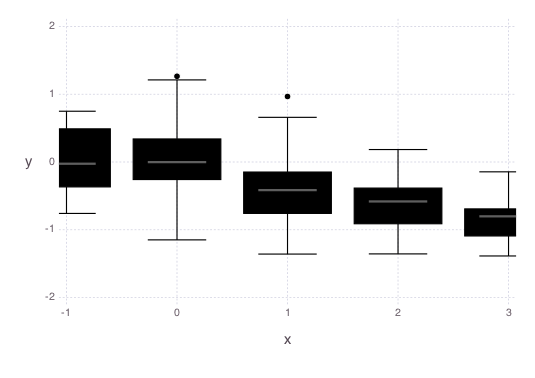

In [28]:
Gadfly.plot(x=diffdata[:ala,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
            Theme(default_color=color("black")))

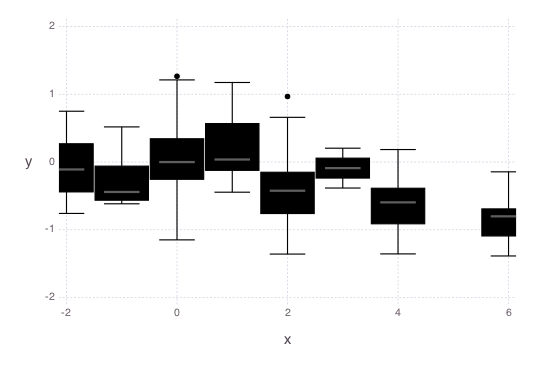

In [29]:
Gadfly.plot(x=diffdata[:ob,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
            Theme(default_color=color("black")))

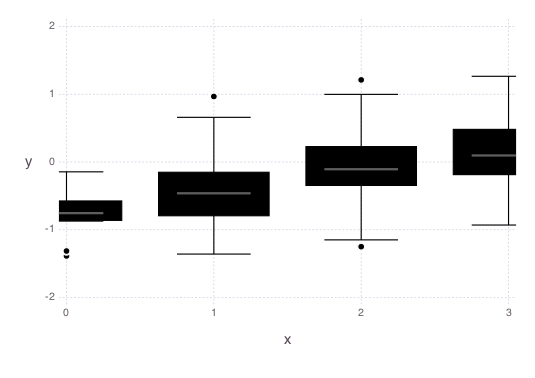

In [30]:
Gadfly.plot(x=basedata[:ala,], y=diffdata[:pe,], Gadfly.Geom.boxplot, 
            Theme(default_color=color("black")))

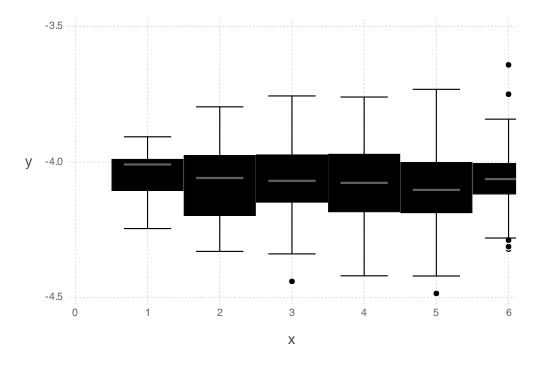

In [31]:
Gadfly.plot(x=mindata[:k,], y=mindata[:pe,], Gadfly.Geom.boxplot, 
            Theme(default_color=color("black")))